<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

In [2]:
## Import Libraries

import itertools
import numpy as np
import pandas as pd


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split


# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [3]:
df = pd.read_csv('breast-cancer-wisconsin-data-old.csv')

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
df.drop(columns = ['1000025'], inplace = True)

In [14]:
df

,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,2
694,2,1,1,1,2,1,1,1,1,2
695,5,10,10,3,7,3,8,10,2,4
696,4,8,6,4,3,4,10,6,1,4


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [16]:
df['1.3'].replace({'?':'1'}, inplace = True)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [17]:
X = df.drop(columns = ['2.1'])
y = df['2.1']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [69]:
np.random.seed(0)

reg = LogisticRegression(random_state = 42)
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)

print(f'The accuracy score for Regression Model for the train data is {reg.score(X_train,y_train)}')
print(f'The accuracy score for Regression Model for the test data is {reg.score(X_test,y_test)}')
print(f'The ROC/AUC score for Regression Model is {roc_auc_score(y_test,y_pred_reg)}\n')

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred_knn = reg.predict(X_test)

print(f'The accuracy score for KNN Model for the train data is {knn.score(X_train,y_train)}')
print(f'The accuracy score for KNN Model for the test data is {knn.score(X_test,y_test)}')
print(f'The ROC/AUC score for KNN Model is {roc_auc_score(y_test,y_pred_knn)}\n')

dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, splitter = 'best', random_state = 42,ccp_alpha = 0.1)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

print(f'The accuracy score for Decision Tree Model for the train data is {knn.score(X_train,y_train)}')
print(f'The accuracy score for Decision Tree for the test data is {knn.score(X_test,y_test)}')
print(f'The ROC/AUC score for Decision Tree Model is {roc_auc_score(y_test,y_pred_dt)}\n')



The accuracy score for Regression Model for the train data is 0.9672131147540983
The accuracy score for Regression Model for the test data is 0.9619047619047619
The ROC/AUC score for Regression Model is 0.9585185185185184

The accuracy score for KNN Model for the train data is 0.9795081967213115
The accuracy score for KNN Model for the test data is 0.9809523809523809
The ROC/AUC score for KNN Model is 0.9585185185185184

The accuracy score for Decision Tree Model for the train data is 0.9795081967213115
The accuracy score for Decision Tree for the test data is 0.9809523809523809
The ROC/AUC score for Decision Tree Model is 0.9451851851851852



In [70]:
reg_boost = AdaBoostClassifier(base_estimator = reg, n_estimators = 100, learning_rate =0.1, random_state = 42)
reg_boost.fit(X_train,y_train)
y_pred_rb = reg_boost.predict(X_test)

print(f'The accuracy score for Regression ADA Boosted Model for the train data is {reg_boost.score(X_train,y_train)}')
print(f'The accuracy score for Regression ADA Boosted Model for the test data is {reg_boost.score(X_test,y_test)}')
print(f'The ROC/AUC score for Regression ADA Boosted  Model is {roc_auc_score(y_test,y_pred_rb)}\n')

dt_boost = AdaBoostClassifier(base_estimator = dt, n_estimators = 50, learning_rate =1, random_state = 42)
dt_boost.fit(X_train,y_train)
y_pred_dt = dt_boost.predict(X_test)

print(f'The accuracy score for Decision Tree ADA Boosted Model for the train data is {dt_boost.score(X_train,y_train)}')
print(f'The accuracy score for Decision Tree ADA Boosted Model for the test data is {dt_boost.score(X_test,y_test)}')
print(f'The ROC/AUC score for Decision Tree ADA Boosted Model is {roc_auc_score(y_test,y_pred_dt)}\n')

The accuracy score for Regression ADA Boosted Model for the train data is 0.9631147540983607
The accuracy score for Regression ADA Boosted Model for the test data is 0.9619047619047619
The ROC/AUC score for Regression ADA Boosted  Model is 0.9585185185185184

The accuracy score for Decision Tree ADA Boosted Model for the train data is 1.0
The accuracy score for Decision Tree ADA Boosted Model for the test data is 0.9619047619047619
The ROC/AUC score for Decision Tree ADA Boosted Model is 0.9614814814814815



In [246]:
grad_boost = GradientBoostingClassifier(loss = 'deviance',
                                        learning_rate = 0.02,
                                        n_estimators = 1500,
                                        subsample = 0.9,
                                        criterion = 'friedman_mse',
                                        min_samples_split = 2,
                                        min_samples_leaf = 1,
                                        max_depth = 8,
                                        init = dt,
                                        random_state = 42,
                                        max_features = 1,
                                        verbose = 0,
                                        ccp_alpha = 0.0)

grad_boost.fit(X_train,y_train)
y_pred_grad = grad_boost.predict(X_test)

In [247]:
print(f'The accuracy score for Decision Tree Gradient Boosted Model for the train data is {grad_boost.score(X_train,y_train)}')
print(f'The accuracy score for Decision Tree Gradiant Boosted Model for the test data is {grad_boost.score(X_test,y_test)}')
print(f'The ROC/AUC score for Decision Tree Gradiant Boosted Model is {roc_auc_score(y_test,y_pred_grad)}\n')

The accuracy score for Decision Tree Gradient Boosted Model for the train data is 1.0
The accuracy score for Decision Tree Gradiant Boosted Model for the test data is 0.9714285714285714
The ROC/AUC score for Decision Tree Gradiant Boosted Model is 0.9748148148148149



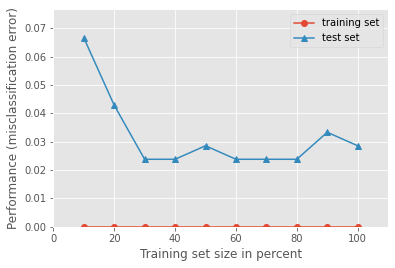

In [248]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, grad_boost, print_model = False, style = 'ggplot')
plt.show()

<Figure size 864x864 with 0 Axes>

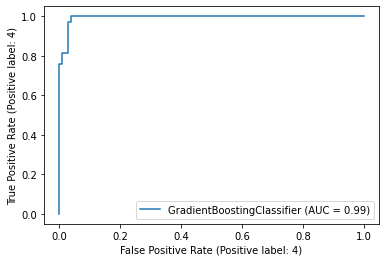

In [249]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize = (12,12))
plot_roc_curve(grad_boost,X_test,y_test)
plt.show()

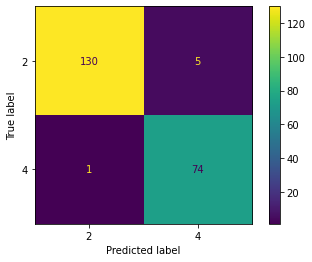

In [250]:
plot_confusion_matrix(grad_boost,X_test,y_test)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [236]:
from sklearn.model_selection import GridSearchCV

In [238]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
model = GridSearchCV(estimator=grad_boost, param_grid = parameters, cv = 2, n_jobs=-1)
model.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=GradientBoostingClassifier(init=DecisionTreeClassifier(ccp_alpha=0.1,
                                                                              criterion='entropy',
                                                                              random_state=42),
                                                  learning_rate=0.01,
                                                  max_features=1,
                                                  random_state=42,
                                                  subsample=0.8),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [239]:
y_predict = model.predict(X_test)


In [242]:
from sklearn.metrics import confusion_matrix

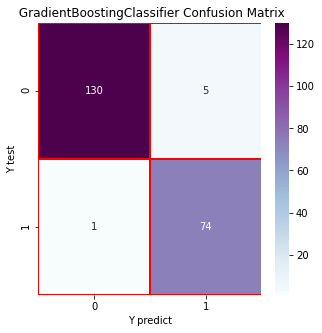

In [243]:
model_cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(model_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title(' GradientBoostingClassifier Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [244]:
model.best_score_

0.9672131147540983

In [245]:
model.best_params_

{'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 1500, 'subsample': 0.9}

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



